In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go


### 5 pre-requisite rule
1) Every data should be numeric in nature, not in categorical type.
2) Data Type is correct or not - make sure you have DateTime column and Target variable (VWAP)
3) There should not be any missing data, if yes, first impute and then try to solve TSF
4) Data should be sequential order (DATETIME Columns) - TimeSeries always in an ascending order
5) We have to check whether in the given dataset - do we have Trend, Seasonality, Cyclicity and Irregular (Noise/Error)


In [147]:
import yfinance as yf

acc = yf.Ticker("ACN")

In [148]:
acc_info = pd.DataFrame.from_dict(acc.info, orient='index',columns=['Info'])

In [149]:
avg_vol = acc_info[acc_info.index == 'averageVolume']

In [150]:
acc_hist = acc.history(period = '10y')

In [151]:
acc_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-05-19 00:00:00-04:00,66.785937,67.123326,66.575069,67.106453,1727600,0.0,0.0
2014-05-20 00:00:00-04:00,66.929338,67.106466,65.950916,66.128044,1797200,0.0,0.0
2014-05-21 00:00:00-04:00,65.934045,67.038995,65.934045,66.946213,1578200,0.0,0.0
2014-05-22 00:00:00-04:00,66.979954,67.089603,66.532910,67.013687,1309200,0.0,0.0
2014-05-23 00:00:00-04:00,67.207679,67.443849,67.038987,67.300461,1199800,0.0,0.0
2014-05-27 00:00:00-04:00,67.317313,67.663139,67.216101,67.561920,1830600,0.0,0.0
2014-05-28 00:00:00-04:00,67.528183,67.604099,67.022103,67.123322,1943100,0.0,0.0
2014-05-29 00:00:00-04:00,67.418542,67.865580,67.013674,67.831841,1320800,0.0,0.0
2014-05-30 00:00:00-04:00,67.865597,68.734370,67.705335,68.700630,2477600,0.0,0.0


In [152]:
acc_hist.reset_index(inplace=True)
acc_hist['Date'] = pd.to_datetime(acc_hist['Date']).dt.date

In [153]:
acc_hist.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [154]:
#acc_hist['VWAP'] =  ((acc_hist[['High', 'Low', 'Close']].mean(axis=1))* acc_hist['Volume'] ) / acc_hist['Volume'].cumsum()

In [155]:
#acc_hist['vol_turnover'] =  acc_hist['Volume'] / int(avg_vol.values)

In [156]:
acc_hist.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-05-19,66.785937,67.123326,66.575069,67.106453,1727600,0.0,0.0
1,2014-05-20,66.929338,67.106466,65.950916,66.128044,1797200,0.0,0.0
2,2014-05-21,65.934045,67.038995,65.934045,66.946213,1578200,0.0,0.0
3,2014-05-22,66.979954,67.089603,66.532910,67.013687,1309200,0.0,0.0
4,2014-05-23,67.207679,67.443849,67.038987,67.300461,1199800,0.0,0.0
5,2014-05-27,67.317313,67.663139,67.216101,67.561920,1830600,0.0,0.0
6,2014-05-28,67.528183,67.604099,67.022103,67.123322,1943100,0.0,0.0
7,2014-05-29,67.418542,67.865580,67.013674,67.831841,1320800,0.0,0.0
8,2014-05-30,67.865597,68.734370,67.705335,68.700630,2477600,0.0,0.0
9,2014-06-02,68.405417,68.945237,68.396980,68.548805,1578100,0.0,0.0


In [157]:
acc_hist.duplicated().sum()

0

In [158]:
acc_hist.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [159]:
import statsmodels.api as sm

#print(sm.stats.durbin_watson(acc_hist['VWAP']))
print(sm.stats.durbin_watson(acc_hist['Open']))
print(sm.stats.durbin_watson(acc_hist['Close']))
print(sm.stats.durbin_watson(acc_hist['Volume']))
print(sm.stats.durbin_watson(acc_hist['High']))
print(sm.stats.durbin_watson(acc_hist['Low']))

0.00026656050549417776
0.0002570438170127886
0.1335026396771612
0.00021771693203233525
0.0002332282109653508


In [160]:
acc_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000,2518.0
mean,187.367320,189.098979,185.748446,187.475689,2.276256e+06,0.012387,0.0
std,91.201305,92.154676,90.295897,91.205757,9.793319e+05,0.116693,0.0
min,63.434927,65.073681,63.246850,64.247078,5.281000e+05,0.000000,0.0
25%,104.242118,104.889750,103.474259,104.244343,1.664750e+06,0.000000,0.0
50%,162.559392,164.293109,161.421267,163.021255,2.059350e+06,0.000000,0.0
75%,273.103701,275.263720,270.971773,273.428734,2.571475e+06,0.000000,0.0
max,401.211006,402.280851,398.724231,400.401367,9.574800e+06,1.460000,0.0


In [161]:
df = acc_hist.drop(['Dividends','Stock Splits'],axis=1)

In [162]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-05-19,66.785937,67.123326,66.575069,67.106453,1727600
1,2014-05-20,66.929338,67.106466,65.950916,66.128044,1797200
2,2014-05-21,65.934045,67.038995,65.934045,66.946213,1578200
3,2014-05-22,66.979954,67.089603,66.532910,67.013687,1309200
4,2014-05-23,67.207679,67.443849,67.038987,67.300461,1199800


In [163]:
df.set_index('Date', inplace=True)

In [164]:
start_date = df.index.min()
end_date = df.index.max()
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2014-05-19
End Date of Stocks : 2024-05-17


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 2014-05-19 to 2024-05-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2518 non-null   float64
 1   High    2518 non-null   float64
 2   Low     2518 non-null   float64
 3   Close   2518 non-null   float64
 4   Volume  2518 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0+ KB


<Axes: xlabel='Date'>

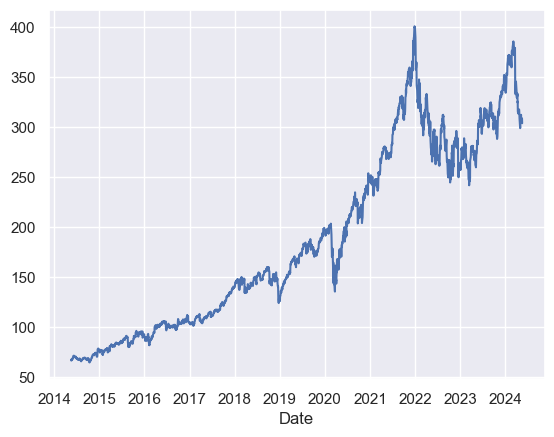

In [166]:
df['Close'].plot()

In [167]:
df.reset_index(inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   Open    2518 non-null   float64
 2   High    2518 non-null   float64
 3   Low     2518 non-null   float64
 4   Close   2518 non-null   float64
 5   Volume  2518 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.2+ KB


In [169]:
df['Date'] = pd.to_datetime(df['Date'])

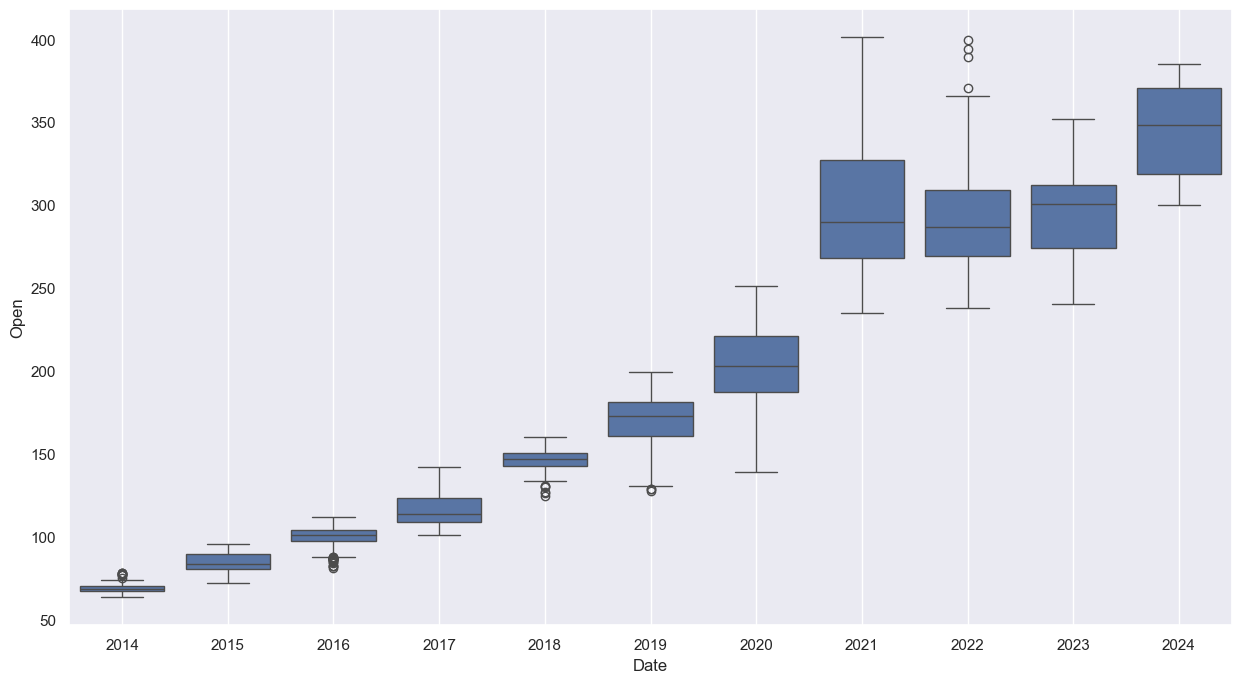

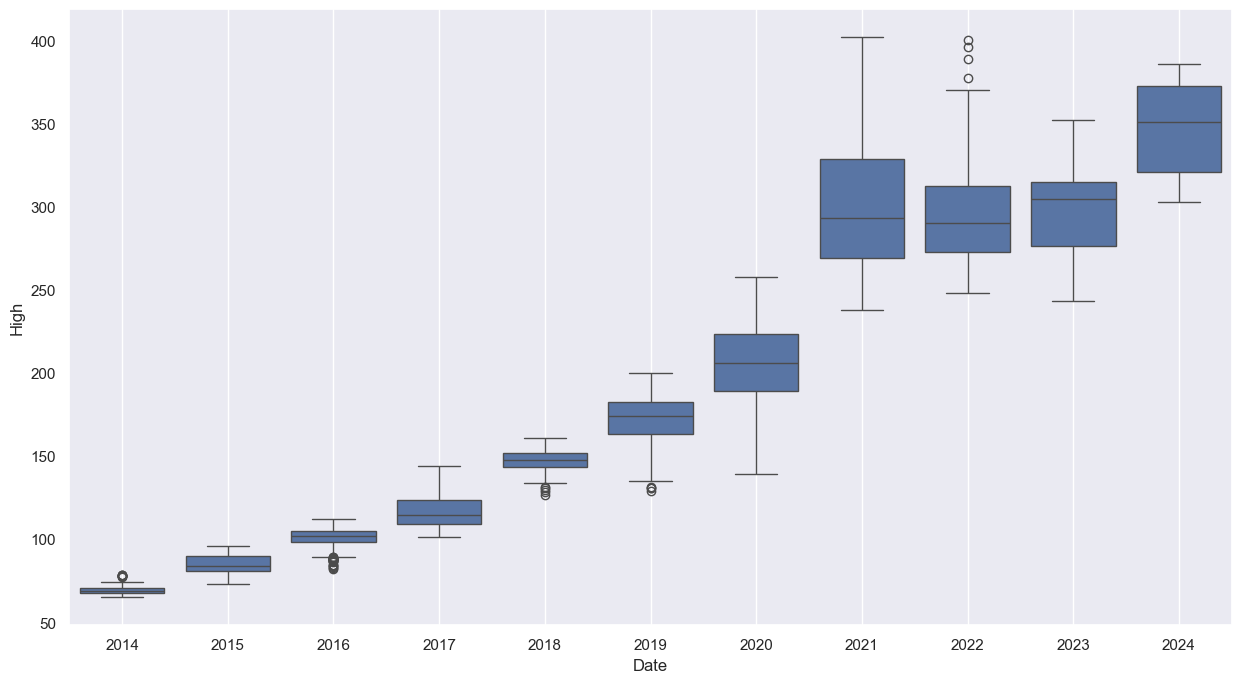

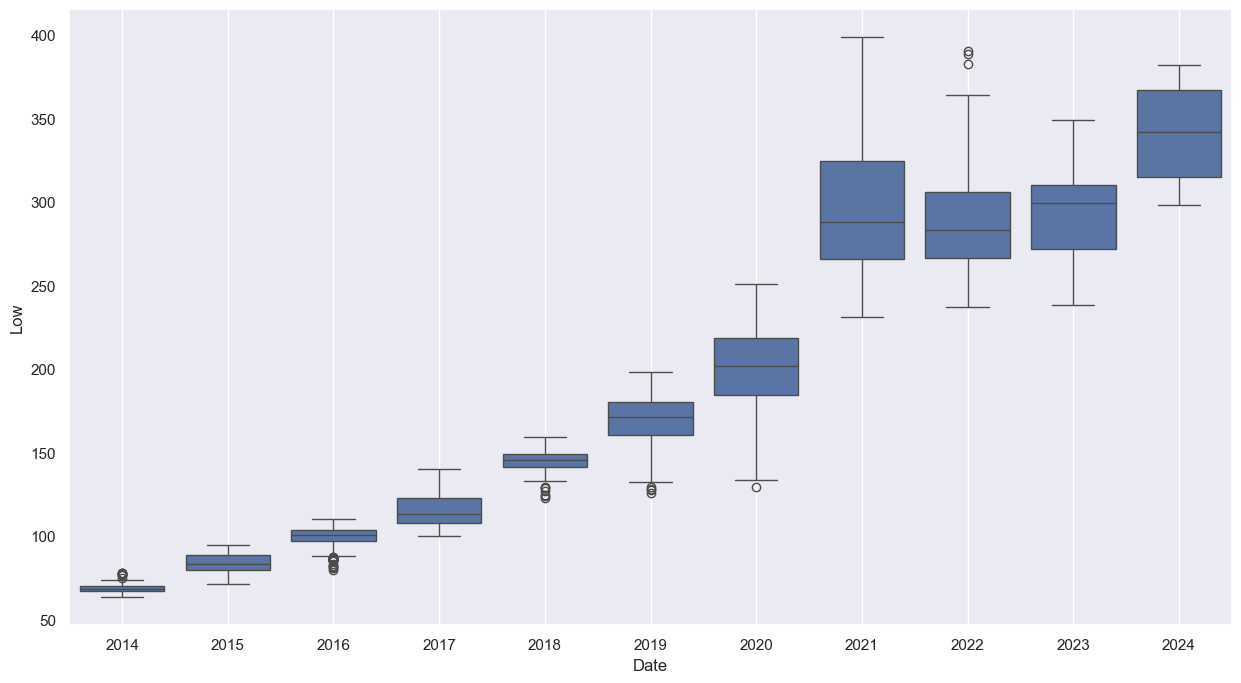

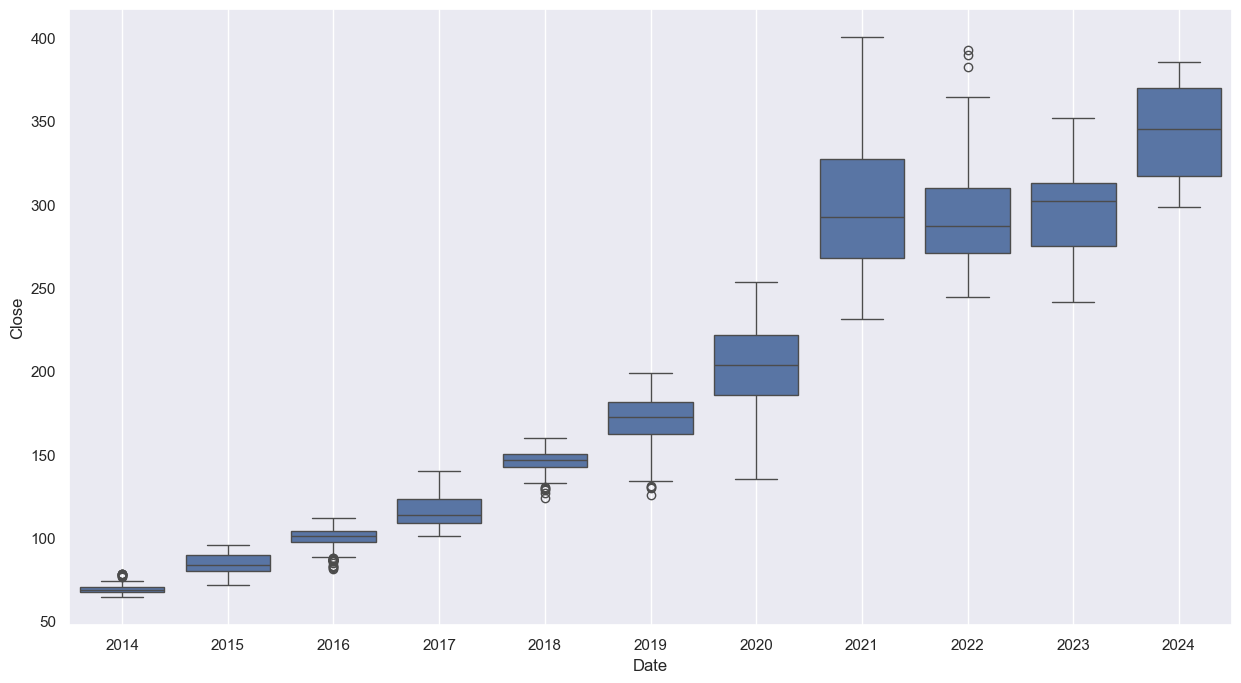

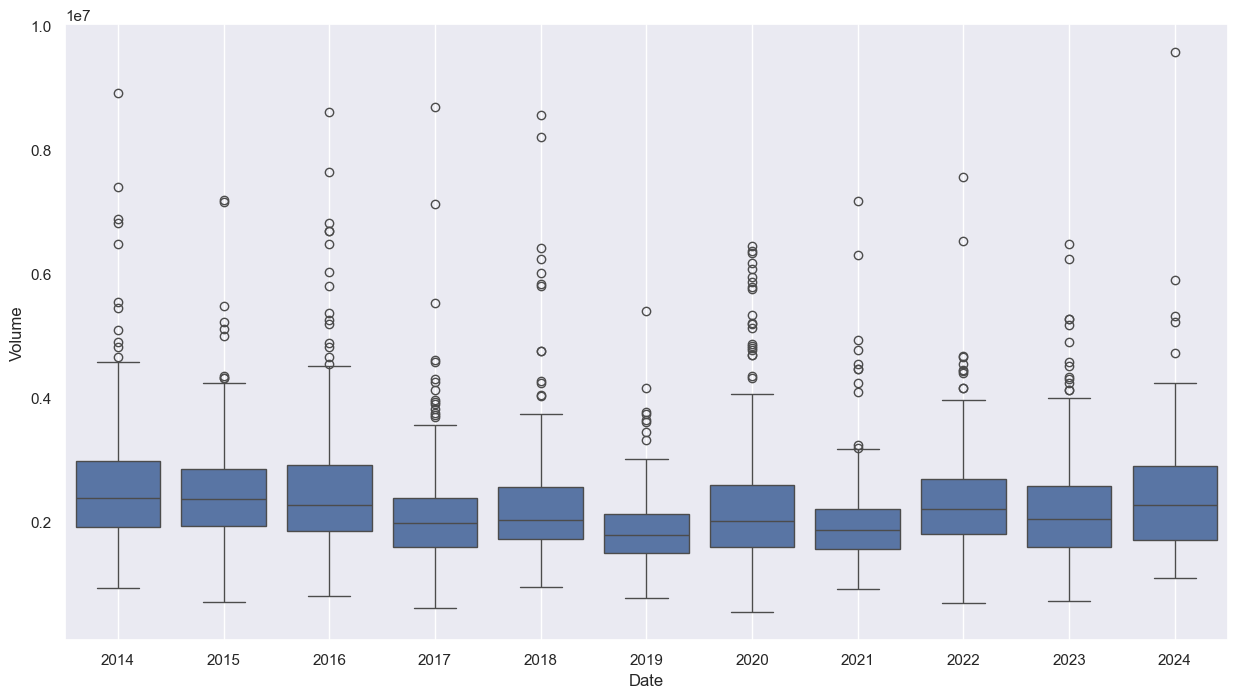

In [170]:
for i in df.columns[1:] :
    plt.figure(figsize=(15,8))
    sns.boxplot(x= df['Date'].dt.year, y=df[i] )
    plt.grid()
    plt.show()

In [171]:
df_final_model = df[['Date', 'Open', 'High', 'Low','Close', 'Volume']]
df_final_model

,Date,Open,High,Low,Close,Volume
0,2014-05-19,66.785937,67.123326,66.575069,67.106453,1727600
1,2014-05-20,66.929338,67.106466,65.950916,66.128044,1797200
2,2014-05-21,65.934045,67.038995,65.934045,66.946213,1578200
3,2014-05-22,66.979954,67.089603,66.532910,67.013687,1309200
4,2014-05-23,67.207679,67.443849,67.038987,67.300461,1199800
...,...,...,...,...,...,...
2513,2024-05-13,308.149994,308.799988,306.880005,307.410004,1695000
2514,2024-05-14,308.899994,312.290009,306.220001,306.950012,1813600
2515,2024-05-15,305.000000,308.519989,301.440002,308.519989,4230800
2516,2024-05-16,309.660004,310.589996,306.750000,308.000000,2583100


In [172]:
df_final_model.set_index('Date',inplace=True)

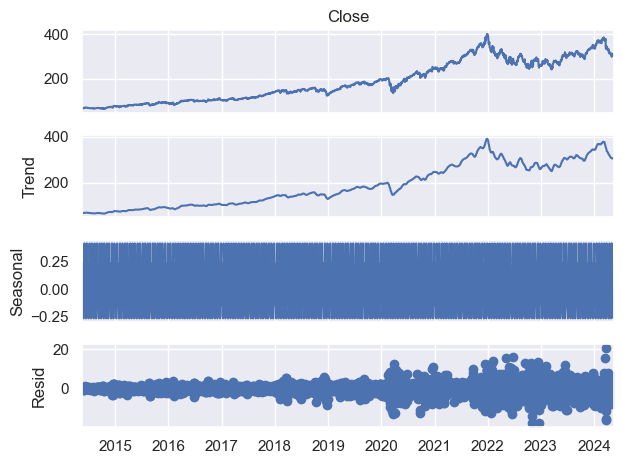

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(df_final_model['Close'], model='additive', period=12)
decompse.plot()
plt.show()

In [174]:
df_final_model['Date'] = df_final_model.index

In [175]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid

print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Date
2014-05-19          NaN
2014-05-20          NaN
2014-05-21          NaN
2014-05-22          NaN
2014-05-23          NaN
2014-05-27          NaN
2014-05-28    67.949932
2014-05-29    68.271502
2014-05-30    68.623649
2014-06-02    68.942759
2014-06-03    69.200719
2014-06-04    69.392960
Name: trend, dtype: float64 

Seasoanlity 
 Date
2014-05-19    0.233381
2014-05-20    0.159980
2014-05-21   -0.091360
2014-05-22   -0.145979
2014-05-23   -0.112676
2014-05-27   -0.238157
2014-05-28   -0.263192
2014-05-29   -0.145860
2014-05-30   -0.023973
2014-06-02   -0.029932
2014-06-03    0.409941
2014-06-04    0.247828
Name: seasonal, dtype: float64 

Residual 
 Date
2014-05-19         NaN
2014-05-20         NaN
2014-05-21         NaN
2014-05-22         NaN
2014-05-23         NaN
2014-05-27         NaN
2014-05-28   -0.563418
2014-05-29   -0.293802
2014-05-30    0.100955
2014-06-02   -0.364022
2014-06-03   -0.555782
2014-06-04    0.746778
Name: resid, dtype: float64 



In [176]:
df_final_model.index.min() , df_final_model.index.max()

(Timestamp('2014-05-19 00:00:00'), Timestamp('2024-05-17 00:00:00'))

In [177]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

,Open,High,Low,Close,Volume,Date,Month,Year
Date,,,,,,,,
2014-05-19,66.785937,67.123326,66.575069,67.106453,1727600,2014-05-19,5,2014
2014-05-20,66.929338,67.106466,65.950916,66.128044,1797200,2014-05-20,5,2014
2014-05-21,65.934045,67.038995,65.934045,66.946213,1578200,2014-05-21,5,2014
2014-05-22,66.979954,67.089603,66.532910,67.013687,1309200,2014-05-22,5,2014
2014-05-23,67.207679,67.443849,67.038987,67.300461,1199800,2014-05-23,5,2014


In [178]:
train_df = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2024-02-23')]

# training data means : 2000-01-03 to 2015-03-22
# test data means : 2015-03-23 to 2021-04-30
test_df = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2024-02-23')]

In [179]:
train_df.shape , test_df.shape

((2458, 8), (60, 8))

In [180]:
# To check Time Series is Stationary or not - this is mandatory steps
# please ensure your data should be stationary
# How will check it - Augmented dickey fuller test 
from statsmodels.tsa.stattools import adfuller

In [181]:
train_final = train_df[['Close']]
test_final = test_df[['Close']]

In [182]:
adfuller(train_final['Close'])

(-0.04466339262051094,
 0.9546788730164587,
 15,
 2442,
 {'1%': -3.4330306663366255,
  '5%': -2.862724291785039,
  '10%': -2.56740044647283},
 12592.44672564481)

In [183]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ['ADF Test', 'P-Value', '#Lags','No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + "----->"+ str(i))
        
    if result[1] <= 0.05:
        print("Strong evidence against Null Hypothesis and my time series is Staionary")
    else:
        print("Weak Evidence against Null Hypothesis and my time series is Non-Stationary")

In [184]:
check_adftest(train_final['Close'])

Augmented Dickey Fuller Test
ADF Test----->-0.04466339262051094
P-Value----->0.9546788730164587
#Lags----->15
No. of Observation----->2442
Weak Evidence against Null Hypothesis and my time series is Non-Stationary


In [185]:
# Since my time series is stationary so we are ready to build Time Series Forecasting

import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # Trend

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))] # Seasonality

print("Examples of parameters combinations for Model...........")
print("Model : {}{}".format(pdq[1], model_pdq[1]))
print("Model : {}{}".format(pdq[0], model_pdq[0]))
print("Model : {}{}".format(pdq[2], model_pdq[2]))
print("Model : {}{}".format(pdq[1], model_pdq[2]))

Examples of parameters combinations for Model...........
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 0)(0, 0, 0, 5)
Model : (0, 0, 2)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 2, 5)


In [186]:
ex_train = train_df[['Open', 'High', 'Low', 'Close', 'Volume']]
ex_test = test_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [187]:
ex_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-05-19,66.785937,67.123326,66.575069,67.106453,1727600
2014-05-20,66.929338,67.106466,65.950916,66.128044,1797200
2014-05-21,65.934045,67.038995,65.934045,66.946213,1578200
2014-05-22,66.979954,67.089603,66.532910,67.013687,1309200
2014-05-23,67.207679,67.443849,67.038987,67.300461,1199800


In [188]:
dfobject = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])
dfobject

,param,seasonal,AIC


In [190]:
# Lets build the model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Close'], 
                                          exog=ex_train,
                                          order= param,
                          seasonal_order= param_seasonal,
                        enforce_stationarity= False,enforce_invertibility=False)
        result_SARIMAX = model.fit()
        print("SARIMAX{}{} - AIC:{}".format(param, param_seasonal, result_SARIMAX.aic))
        dfobject = pd.concat([dfobject, pd.DataFrame([{"param":param, "seasonal":param_seasonal, 
                                   "AIC" : result_SARIMAX.aic}])], ignore_index=True)

SARIMAX(0, 0, 0)(0, 0, 0, 5) - AIC:-52046.851782690916
SARIMAX(0, 0, 0)(0, 0, 1, 5) - AIC:-51938.58391962524
SARIMAX(0, 0, 0)(0, 0, 2, 5) - AIC:-51830.4212344607
SARIMAX(0, 0, 0)(1, 0, 0, 5) - AIC:-51960.09988724072
SARIMAX(0, 0, 0)(1, 0, 1, 5) - AIC:-51933.490879852616
SARIMAX(0, 0, 0)(1, 0, 2, 5) - AIC:-51824.75492877837
SARIMAX(0, 0, 0)(2, 0, 0, 5) - AIC:-51852.16001792327
SARIMAX(0, 0, 0)(2, 0, 1, 5) - AIC:-51848.87175260777
SARIMAX(0, 0, 0)(2, 0, 2, 5) - AIC:-51824.06691705408
SARIMAX(0, 0, 1)(0, 0, 0, 5) - AIC:-52023.25514375177
SARIMAX(0, 0, 1)(0, 0, 1, 5) - AIC:-51914.95416011468
SARIMAX(0, 0, 1)(0, 0, 2, 5) - AIC:-51806.79622335202
SARIMAX(0, 0, 1)(1, 0, 0, 5) - AIC:-51957.69122216247
SARIMAX(0, 0, 1)(1, 0, 1, 5) - AIC:-51909.98396121655
SARIMAX(0, 0, 1)(1, 0, 2, 5) - AIC:-51801.2503415447
SARIMAX(0, 0, 1)(2, 0, 0, 5) - AIC:-51849.75135284502
SARIMAX(0, 0, 1)(2, 0, 1, 5) - AIC:-51846.52426989183
SARIMAX(0, 0, 1)(2, 0, 2, 5) - AIC:-51800.50509694725
SARIMAX(0, 0, 2)(0, 0, 0, 5)

In [191]:
dfobject.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 5)",-52046.851783
27,"(1, 0, 0)","(0, 0, 0, 5)",-52044.851783
9,"(0, 0, 1)","(0, 0, 0, 5)",-52023.255144
54,"(2, 0, 0)","(0, 0, 0, 5)",-52021.663809
36,"(1, 0, 1)","(0, 0, 0, 5)",-52021.487980
...,...,...,...
26,"(0, 0, 2)","(2, 0, 2, 5)",-51777.260005
50,"(1, 0, 2)","(1, 0, 2, 5)",-51775.837062
53,"(1, 0, 2)","(2, 0, 2, 5)",-51775.250340
77,"(2, 0, 2)","(1, 0, 2, 5)",-51774.091121


In [192]:
#(0, 0, 2)	(0, 0, 2, 5)	-52046.851782
model = sm.tsa.statespace.SARIMAX(train_final['Close'], exog=ex_train,order= (0,0,2),
                          seasonal_order= (0,0,2,5),
                        enforce_stationarity= False,enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 2458
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 5)   Log Likelihood               25901.721
Date:                           Sun, 19 May 2024   AIC                         -51783.441
Time:                                   14:11:33   BIC                         -51725.423
Sample:                                        0   HQIC                        -51762.354
                                          - 2458                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open        3.334e-15   1.18e-12      0.003      0.998   -2.31e-12    2.32e-12
High       -4.718e-16    1.2e-12     -0.000

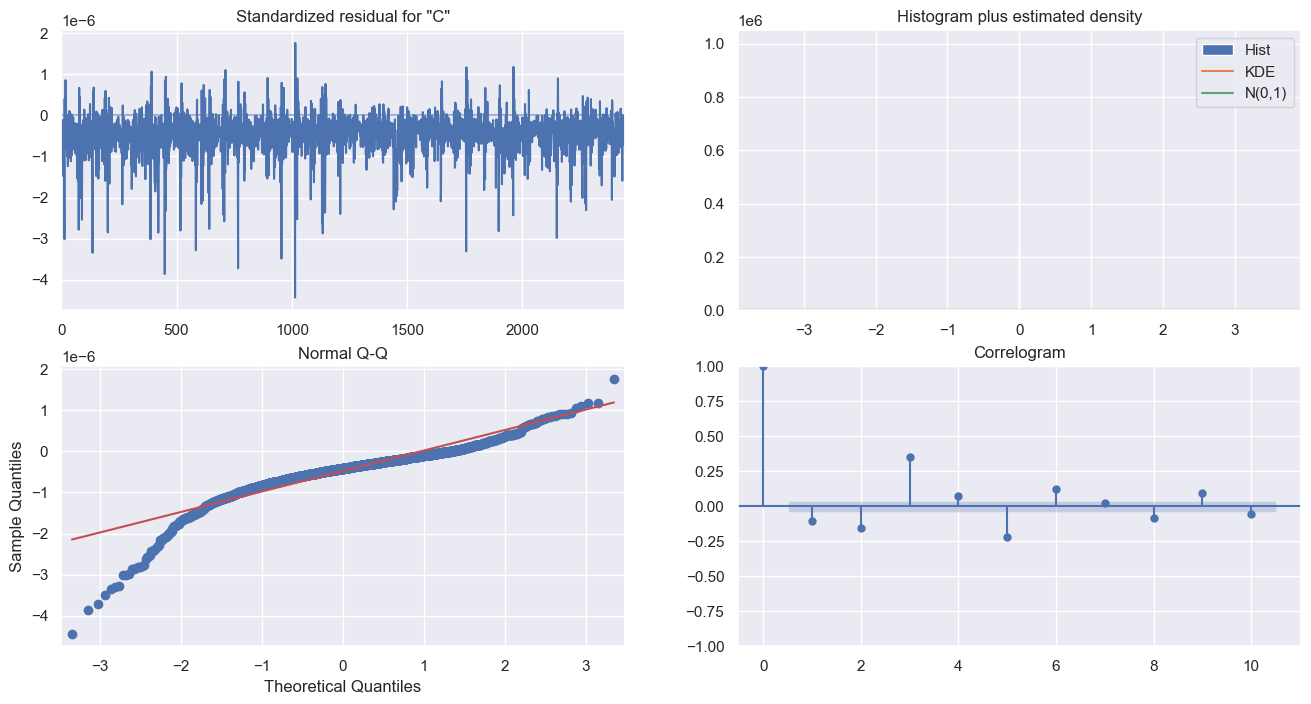

In [193]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

In [194]:
pred_SARIMAX = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_SARIMAX.predicted_mean

2458    375.864655
2459    376.024048
2460    376.452362
2461    376.571899
2462    373.334442
2463    379.520477
2464    382.229980
2465    375.426361
2466    379.361084
2467    385.417664
2468    376.711395
2469    371.780457
2470    379.012482
2471    377.259247
2472    376.751221
2473    373.155151
2474    371.232605
2475    376.621704
2476    378.972626
2477    343.699188
2478    336.198242
2479    332.532440
2480    335.092529
2481    339.624969
2482    345.273071
2483    337.861816
2484    335.162231
2485    330.998383
2486    329.195343
2487    331.715607
2488    330.520203
2489    333.160004
2490    324.399994
2491    325.190002
2492    315.399994
2493    313.269989
2494    313.940002
2495    314.540009
2496    316.000000
2497    316.880005
2498    317.420013
2499    316.829987
2500    313.540009
2501    309.000000
2502    308.010010
2503    303.160004
2504    300.910004
2505    298.660004
2506    300.339996
2507    303.709991
2508    306.059998
2509    310.660004
2510    311.

In [195]:
from sklearn.metrics import *
from math import sqrt

In [196]:
rmse = sqrt(mean_squared_error(test_final.Close,pred_SARIMAX.predicted_mean, squared=False ))
print(rmse)

4.244586424027553e-06


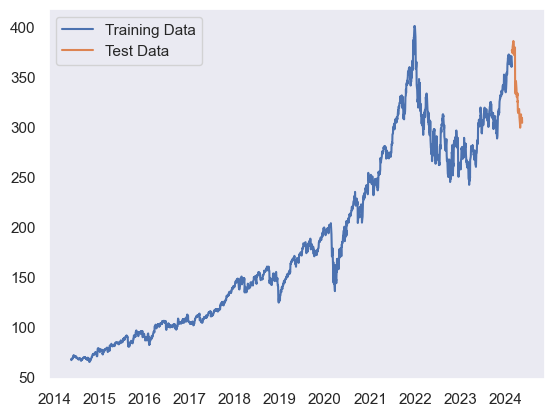

In [197]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.legend(loc='best')
plt.grid();

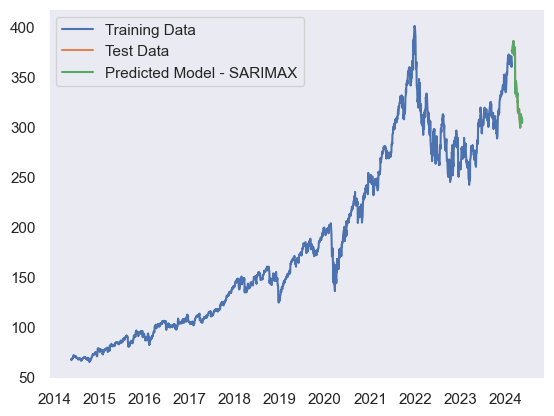

In [198]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [199]:
model = sm.tsa.statespace.SARIMAX(train_final['Close'],order= (0,0,2), seasonal_order= (0,0,2,5),
                        enforce_stationarity= False,enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 2458
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 5)   Log Likelihood              -10994.535
Date:                           Sun, 19 May 2024   AIC                          21999.070
Time:                                   14:11:49   BIC                          22028.079
Sample:                                        0   HQIC                         22009.614
                                          - 2458                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.6613      0.003    486.355      0.000       1.655       1.668
ma.L2          1.0184      0.004    287.913

In [200]:
pred_SARIMA = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_SARIMA.predicted_mean

2458    340.130698
2459    273.555128
2460    219.648963
2461    231.806778
2462    250.210127
2463    207.740877
2464    114.353953
2465     51.454446
2466     59.454017
2467     68.136583
2468     53.425864
2469     19.780471
2470      0.000000
2471      0.000000
2472      0.000000
2473      0.000000
2474      0.000000
2475      0.000000
2476      0.000000
2477      0.000000
2478      0.000000
2479      0.000000
2480      0.000000
2481      0.000000
2482      0.000000
2483      0.000000
2484      0.000000
2485      0.000000
2486      0.000000
2487      0.000000
2488      0.000000
2489      0.000000
2490      0.000000
2491      0.000000
2492      0.000000
2493      0.000000
2494      0.000000
2495      0.000000
2496      0.000000
2497      0.000000
2498      0.000000
2499      0.000000
2500      0.000000
2501      0.000000
2502      0.000000
2503      0.000000
2504      0.000000
2505      0.000000
2506      0.000000
2507      0.000000
2508      0.000000
2509      0.000000
2510      0.

In [201]:
rmse = sqrt(mean_squared_error(test_final.Close,pred_SARIMA.predicted_mean, squared=False ))
print(rmse)

17.678437145933803


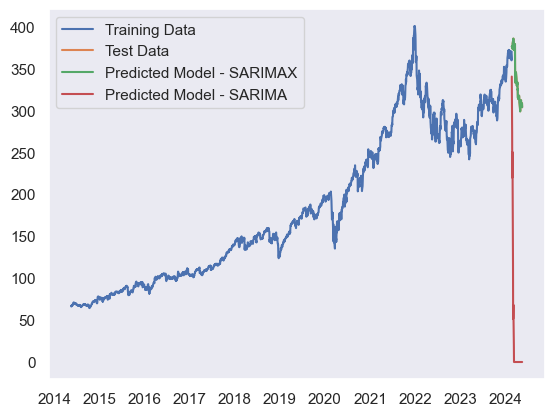

In [202]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Model - SARIMA')
plt.legend(loc='best')
plt.grid();

## ARIMA

In [203]:
model = sm.tsa.statespace.SARIMAX(train_final['Close'],
                       order= (0,0,2),
                        enforce_stationarity= False,enforce_invertibility=False)
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2458
Model:               SARIMAX(0, 0, 2)   Log Likelihood              -13414.126
Date:                Sun, 19 May 2024   AIC                          26834.253
Time:                        14:11:52   BIC                          26851.670
Sample:                             0   HQIC                         26840.582
                               - 2458                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.9023      0.007    285.804      0.000       1.889       1.915
ma.L2          1.0695      0.007    160.108      0.000       1.056       1.083
sigma2      2844.9177    130.800     21.750      0.0

In [204]:
pred_ARIMA = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_ARIMA.predicted_mean

2458    272.443918
2459     86.247584
2460      0.000000
2461      0.000000
2462      0.000000
2463      0.000000
2464      0.000000
2465      0.000000
2466      0.000000
2467      0.000000
2468      0.000000
2469      0.000000
2470      0.000000
2471      0.000000
2472      0.000000
2473      0.000000
2474      0.000000
2475      0.000000
2476      0.000000
2477      0.000000
2478      0.000000
2479      0.000000
2480      0.000000
2481      0.000000
2482      0.000000
2483      0.000000
2484      0.000000
2485      0.000000
2486      0.000000
2487      0.000000
2488      0.000000
2489      0.000000
2490      0.000000
2491      0.000000
2492      0.000000
2493      0.000000
2494      0.000000
2495      0.000000
2496      0.000000
2497      0.000000
2498      0.000000
2499      0.000000
2500      0.000000
2501      0.000000
2502      0.000000
2503      0.000000
2504      0.000000
2505      0.000000
2506      0.000000
2507      0.000000
2508      0.000000
2509      0.000000
2510      0.

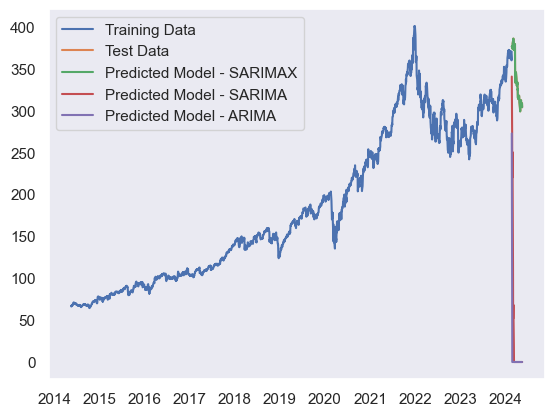

In [205]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Model - SARIMA')
plt.plot(test_final.index, pred_ARIMA.predicted_mean, label='Predicted Model - ARIMA')
plt.legend(loc='best')
plt.grid();